In [ ]:
!pip install EMD-signal
!pip install vnstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 359.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import PyEMD as pe
from vnstock import *

Observations:  1634
            Open  High   Low  Close  Volume Ticker
Time                                              
2017-06-02  3410  3440  3290   3320    2580    VIB
2017-06-05  3320  3410  3290   3290   39900    VIB
2017-06-06  3310  3320  3290   3320   53340    VIB
2017-06-07  3420  3420  3310   3340   69855    VIB
2017-06-08  3310  3310  3290   3310   50310    VIB
2017-06-09  3290  3310  3290   3290   43100    VIB


<Axes: xlabel='Time'>

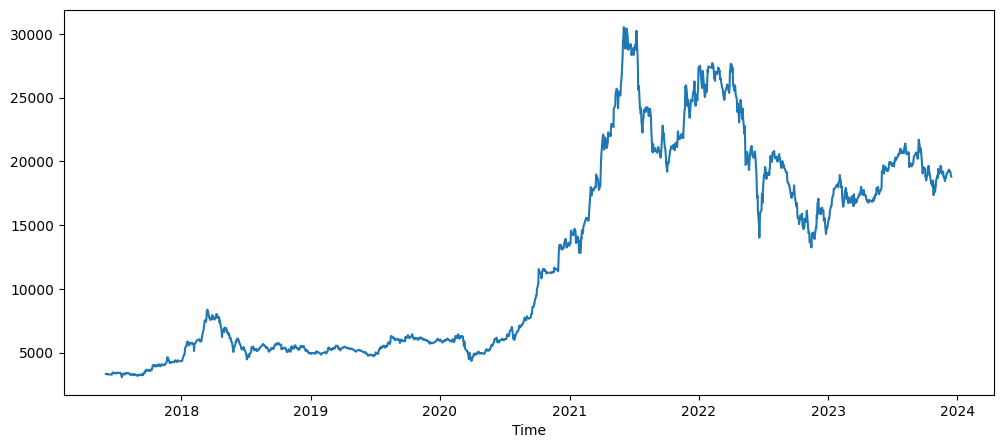

In [ ]:
# Import data
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
print(pd.DataFrame(VIB.head(6)))
train_dates = VIB.index
plt.figure(figsize=(12, 5))
VIB["Close"].plot()

In [ ]:
VIB = VIB.reset_index(drop = True)
df = VIB['Close']
df

0        3320
1        3290
2        3320
3        3340
4        3310
        ...  
1629    19200
1630    19200
1631    19050
1632    18900
1633    18800
Name: Close, Length: 1634, dtype: int64

In [ ]:
## (A) CEEMDAN
#### 1. Thêm white noise vào chuỗi gốc s(t) thành chuỗi s1(t)
#### 2. Decompose chuỗi s1(t) bằng EMD ra các chuỗi IMF1 và Residue1
#### 3. Trung bình các chuỗi IMF1(t) thành mIMF1(t)
#### 4. r1(t) = s1(t) - mIMF1(t)
#### 5. Chuỗi mới s2(t) = r1(t) + coef*EMD(noise)
#### 6. Làm lại từ 1->5 đến khi chuỗi residue dừng

In [ ]:
from PyEMD import EMD, CEEMDAN

In [ ]:
ceemdan = CEEMDAN(range_thr=0.001, total_power_thr=0.01)
cIMFs = ceemdan.ceemdan(S=np.array(df.values), T= np.array(df.index))

In [ ]:
pd.DataFrame(cIMFs.T, columns = ["IMF"+str(i+1) for i in range(cIMFs.shape[0])])

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7,IMF8
0,7.847065,-1.126708,21.089443,-45.350323,32.738824,147.051417,-1182.156058,4339.906339
1,-20.063613,-4.622290,25.676844,-48.883028,33.874758,147.330068,-1182.297302,4338.984563
2,7.279301,-2.303176,28.262256,-51.684376,35.197410,147.379220,-1182.199500,4338.068865
3,15.738495,11.287671,27.338684,-53.579014,36.721862,147.194039,-1181.860944,4337.159206
4,-7.288164,9.792259,21.592833,-54.299619,38.457228,146.769922,-1181.280019,4336.255559
...,...,...,...,...,...,...,...,...
1629,-56.177388,154.913286,309.417331,-250.105349,-811.842898,2783.208519,-4202.185234,21272.771733
1630,43.044346,98.205168,273.846549,-267.328627,-794.568395,2778.648933,-4197.995971,21266.147997
1631,7.222069,40.485094,217.945736,-275.966370,-779.319347,2773.795822,-4193.621103,21259.458098
1632,-22.202343,-18.131661,150.755865,-276.500453,-766.212324,2768.649961,-4189.061077,21252.702033


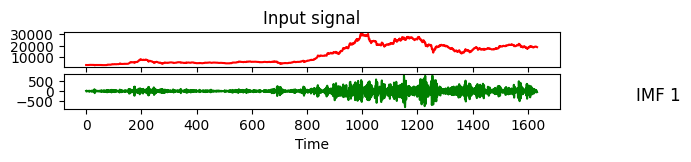

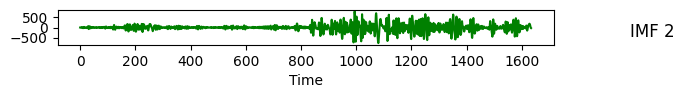

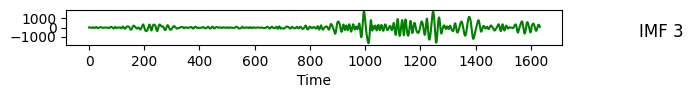

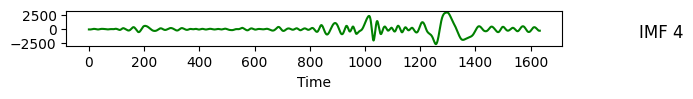

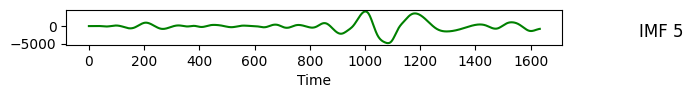

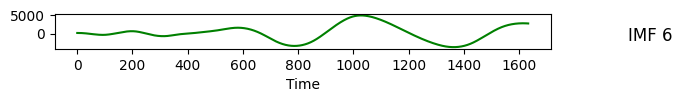

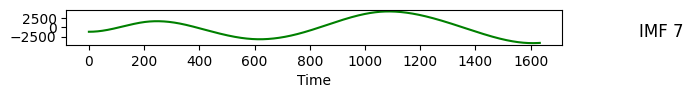

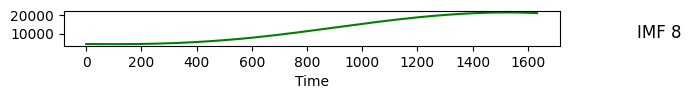

In [ ]:
N = cIMFs.shape[0]+1
# Plot results
plt.subplot(N,1,1)
plt.plot(df.index, df.values, 'r')
plt.title("Input signal")
plt.xlabel("Time")

for n, imf in enumerate(cIMFs):
  plt.subplot(N,1,n+2)
  plt.plot(df.index, imf, 'g')
  plt.title("IMF "+str(n+1), x=1.2, y = 0)
  plt.xlabel("Time")
  plt.show()

In [ ]:
# Tính residue
scIMF = cIMFs.sum(axis = 0).reshape(-1, 1)
residue = (np.array(df)-cIMFs.sum(axis = 0)).reshape(-1,1)

print("sIMF:", scIMF.shape)
print("Residue:", residue.shape)

sIMF: (1634, 1)
Residue: (1634, 1)


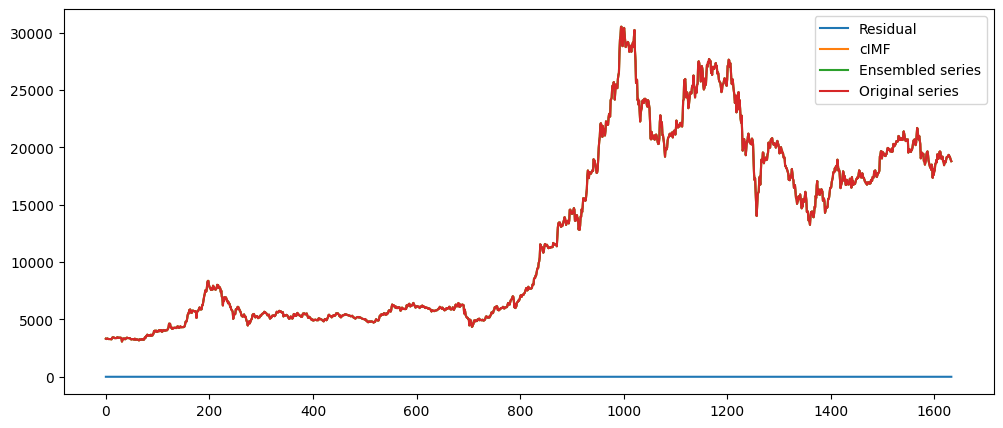

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(range(0,len(df)), residue)
plt.plot(range(0,len(df)), scIMF)
plt.plot(range(0,len(df)), scIMF+residue)
plt.plot(df)
plt.legend(["Residual", "cIMF", "Ensembled series", "Original series"])

plt.show()

# (B) LSTM
## 0. Prepocessing

In [ ]:
# load các thư viện cần thiết
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler

In [ ]:
# Scale data to 0-1
scaler = StandardScaler()
def Scaling (data):
    IMFscale = scaler.fit_transform(np.array(data))

    return IMFscale
IMFscale = Scaling(cIMFs)
#train_scaled = scaler.inverse_transform(train_scaled)
#pd.DataFrame(train_scaled, columns=["IMF"+str(i+1) for i in range(cIMFs.shape[0])])

In [ ]:
IMFscale_t = IMFscale.T
IMFscale_t.shape

(1634, 8)

(1634, 8)
Train:  (1307, 8)
Test:  (327, 8)


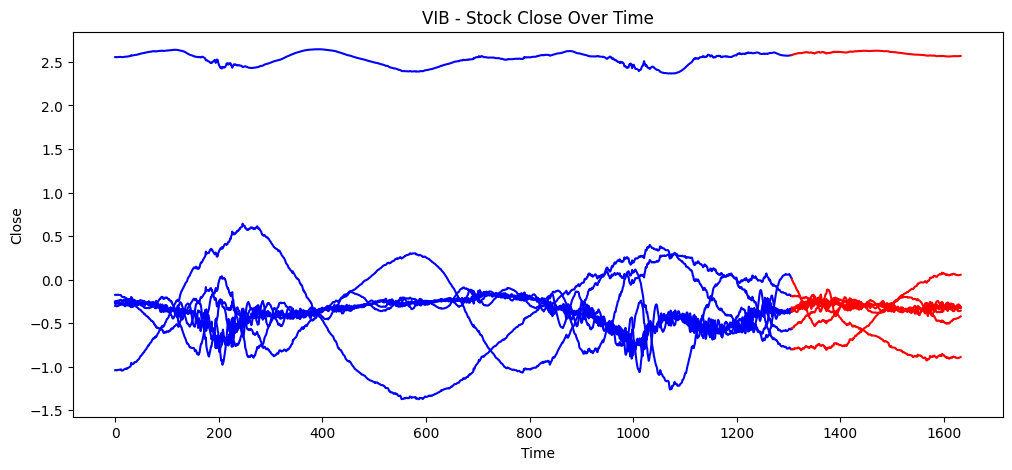

In [ ]:
print(IMFscale_t.shape)
# Chia train test
train_size = int(0.8*IMFscale_t.shape[0])
test_size = int(0.2*IMFscale_t.shape[0])
train_data = IMFscale_t[:train_size]
test_data = IMFscale_t[train_size:]

print("Train: ", train_data.shape)
print("Test: ", test_data.shape)

# Plotting both training and test data on the same chart
plt.figure(figsize=(12,5))

plt.plot(range(train_size), train_data, linestyle='-', color='b')
plt.plot(range(train_size -1,  train_size+test_size), test_data, linestyle='-',  color='r')

plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.show()

In [ ]:
train_data[:,0].shape

(1307,)

In [ ]:
# IMFscale_t
trainX = []
trainY = []

n_past = 60
n_future = 1

for i in range(n_past, len(train_data) - n_future + 1):
    past_sequence = train_data[i - n_past:i, :]  # Exclude the first column ("Close") for trainX
    future_sequence = train_data[i + n_future - 1: i + n_future, :]  # Use the "Close" column for trainY

    trainX.append(past_sequence)
    trainY.append(future_sequence)

trainX, trainY = np.array(trainX), np.array(trainY)
trainY = trainY.reshape(trainY.shape[0], trainY.shape[2])

print("X train: ", trainX.shape)
print("Y train: ", trainY.shape)

X train:  (1247, 60, 8)
Y train:  (1247, 8)


In [ ]:
testX = []
testY = []

for i in range(n_past, len(test_data) - n_future + 1):
    past_sequence = test_data[i - n_past:i, :]  # Exclude the first column ("Close") for trainX
    future_sequence = test_data[i + n_future - 1: i + n_future, :]  # Use the "Close" column for trainY

    testX.append(past_sequence)
    testY.append(future_sequence)

testX, testY = np.array(testX), np.array(testY)
testY = testY.reshape(testY.shape[0], testY.shape[2])

print("X test: ", testX.shape)
print("Y test: ", testY.shape)

X test:  (267, 60, 8)
Y test:  (267, 8)


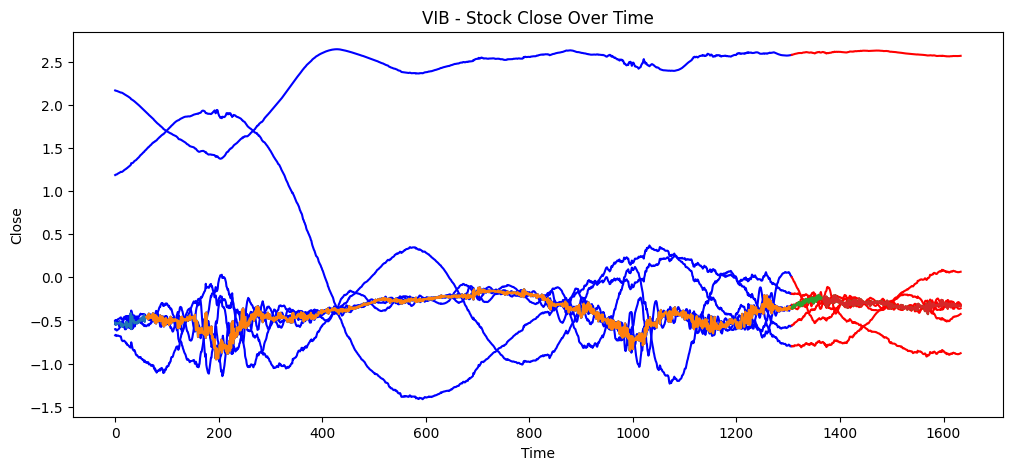

In [ ]:
# Plotting both training and test data on the same chart
plt.figure(figsize=(12,5))

plt.plot(range(train_size), train_data, linestyle='-', color='b', label='Training Data')
plt.plot(range(train_size-n_past), trainX[:,0,0], linestyle='-', label='Training Data X')
plt.plot(range(n_past,train_size), trainY[:,0], linestyle='-', label='Training Data Y')
plt.plot(range(train_size, train_size+test_size+1), test_data, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size, train_size+test_size-n_past+1), testX[:,0,0], linestyle='-',  label='Test Data X')
plt.plot(range(train_size+n_past, train_size+test_size+1), testY[:,0], linestyle='-', label='Test Data Y')


plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')

plt.show()

In [ ]:
trainY[:].shape
trainX[:,:,i].reshape(trainX.shape[0], trainX.shape[1], 1)

(1247, 60, 1)

In [ ]:
## 1. Train model
# Tạo model lstm cho việc training
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], 1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mape')
model.summary()

def createModel():
  model = Sequential()
  model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], 1), return_sequences=True))
  model.add(LSTM(32, activation='relu', return_sequences=False))
  model.add(Dropout(0.2))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mape')
  model.summary()
  return model

In [ ]:
# fit the model
history = []
models = []
for i in range(8):
  mod = createModel()
  his = mod.fit(trainX[:,:,i].reshape(trainX.shape[0], trainX.shape[1], 1),
                  trainY[:,i],
                  epochs=80, batch_size=24, validation_split=0.2, verbose = 1)
  history.append(his)
  models.append(mod)
#history = model.fit(trainX, trainY, epochs=100, batch_size=10, validation_split=0.1, verbose=1)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 60, 64)            16896     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
57/57 [==============================] - 11s 85ms/step - loss: 40.2364 - val_loss: 14.0734
Epoch 2/50
57/57 [===========================

In [1]:
#prediction = model.predict(testX)
#prediction_copies = np.repeat(prediction, train_data.shape[1], axis=-1)
#y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
#print(y_pred_future)

predicts = []
for i in range(8):
  #tạo predict mới cho test X: predict Y chua scale lai
  pred_y = models[i].predict(testX[:,:,i])
  print("Predict ", i)
  print(pred_y)

  predicts.append(pred_y)
#predicts = np.array(predicts)
print("Predict set: ", predicts.shape)

NameError: ignored

In [ ]:
# Scale nguoc lai
# Scale truc tiep tu array predict
# row x 8 cols
#pred_back = scaler.inverse_transform(predicts.T)

predicts_rs = predicts.reshape(predicts.shape[0], predicts.shape[1])
predicts_rs = predicts_rs.T

pred_cop = np.repeat(predicts_rs, 1, axis=-1)
pred_back = scaler.inverse_transform(pred_cop)[:,0]
pred_back

ValueError: ignored

In [ ]:
train_back = scaler.inverse_transform(train_data)
test_back = scaler.inverse_transform(test_data)

In [ ]:
s_train = train_back.sum(axis = 1)
s_test = test_back.sum(axis = 1)
s_pred = pred_back.sum(axis = 1)

print("Train: ", s_train.shape)
print("Test: ", s_test.shape)
print("Predict: ", s_pred.shape)

In [ ]:
plt.figure(figsize=(12, 5))
n_future = 60

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),s_test.reshape(-1,1), linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), s_train, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+n_future-1, train_size+test_size),  s_pred, label='Predict', linestyle='-',  color='orange')
# # Plot predicted values
#plt.plot( test_Date, y_pred, label='Predicted', linestyle='-',  color='b')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [ ]:
### 3. Predict 60 days
n_past = 1
n_days_for_prediction= 60

#print(test_data.reshape(1,-1).T.shape)

test_for_forecast = test_data.reshape(1,-1).T

x_forecast = []
y_forecast = []

for i in range(n_days_for_prediction):
  # B1 Duyệt dữ liệu test n ngày gần nhất => bỏ vào x tạm
  x = np.array(test_for_forecast[(-60):])
  print(x.shape)
  x = x.T.reshape(x.shape[1], x.shape[0], 1)
  print(x.shape)

  # B2 dùng predict để chạy 1 ngày
  y = model.predict(x)
  # B3 thêm data ngày đó vào y_forecast, test_for_forecast và append x vào x_forecast
  y_c = np.repeat(y, x.shape[1], axis=-1)
  y_pr = scaler.inverse_transform(y_c)[:,0]

  x_forecast.append(x)
  y_forecast.append(y_pr)
  test_for_forecast = np.append(test_for_forecast, y).reshape(-1,1)
  print(test_for_forecast.shape)
  #test_for_forecast.append(y)
  # B4 lặp lại đến ngày thứ 60

x_forecast = np.array(x_forecast)
y_forecast = np.array(y_forecast)

In [ ]:
print(y_forecast)

In [ ]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_back.reshape(-1,1), linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_back, linestyle='-', color='b', label='Training Data')
# Plot predict test and actual test
plt.plot(range(train_size + 60, train_size + test_size+1),  y_pred_future, label='Predict', linestyle='-',  color='orange')
# Plot 60 days
plt.plot(range(train_size+test_size, train_size+test_size+60), y_forecast, linestyle='-', color='b', label='60 days')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [ ]:
def RSME (data1, data2):
    return np.sqrt(np.mean((data1-data2)*(data1-data2)))
def MAE (data1, data2):
    return np.mean(np.absolute(data1-data2))
def MAPE (pred, actual):
    return np.mean(np.absolute((pred-actual)/actual))*100

In [ ]:
print("RSME: ", RSME(y_pred_future, test_back[60:]))
print("MAE: ", MAE(y_pred_future, test_back[60:]))
print("MAPE: ", MAPE(y_pred_future, test_back[60:]))